###### *The goal of this project is to develop a model that accurately predicts the characteristics of a working sensor in water and isopropanol based on the measured characteristics in air.It shalll enable the reduction of the validation process only to measurements in the air, but other characteristics can be collected based on proposed models.*

###### *Along the project i convert the signals into frequency domain for better understanding of the signals and attempt to extract features for further analysis* 

###### *Next I will use supervised learning approach and will treat it as regression problem. I will apply several regression models and compare and evalute their performance*

###### *At the end i will summarize by describing other potential methods and i will mention several characteristics that one could consider* 



### 1. Loading Data & Data Preprocessing


* Starting by downloading the dataset and reading the data files into Python using pandas/numpy. 
* Merging the data from the  files for each sensor into a single dataset
* Checking for missing or inconsistent values, and handling any issues
* Exploring the dataset to gain an understanding of the data

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob
from scipy.signal import spectrogram
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [2]:
cd '/Users/mastermind/LEARNING PYTHON/AI for the Industry 4.0/dataset'

/Users/mastermind/LEARNING PYTHON/AI for the Industry 4.0/dataset


In [3]:
files = list(os.listdir())
all_file_names = sorted(files)
for counter, file in enumerate(all_file_names):
    print(counter, file)

0 .DS_Store
1 sesion_01_20
2 sesion_02_20
3 sesion_03_20
4 sesion_04_20
5 sesion_05_20
6 sesion_06_20
7 sesion_07_20
8 sesion_08_20
9 sesion_09_20
10 sesion_10_20


In [4]:
import pandas as pd
import glob

# ALL DATA 

# Path to main directory
main_dir = '/Users/mastermind/LEARNING PYTHON/AI for the Industry 4.0/dataset/'

# Find all .txt files in subdirectories
file_paths = glob.glob(main_dir + '/**/*.txt', recursive=True)

# Loop through each file and read into pandas dataframe
dfs = []
for file_path in file_paths:
    df = pd.read_csv(file_path, delimiter='=', header=None, names=['signal wavelength', 'signal amplitude'])
    df = df['signal wavelength'].str.split(',', expand=True).astype(float)
    df.columns = ['signal wavelength', 'signal amplitude']
    dfs.append(df)

# Concatenate all dataframes into one
df_all = pd.concat(dfs, axis=0)


print(df_all.info())
print("*"*50)
print(df_all)


# AIR

# Find all .txt files in subdirectories
file_paths = glob.glob(main_dir + '/**/*_air.txt', recursive=True)

# Loop through each file and read into pandas dataframe
air_all = []
for file_path in file_paths:
    df = pd.read_csv(file_path, delimiter='=', header=None, names=['air signal wavelength', 'air signal amplitude'])
    df = df['air signal wavelength'].str.split(',', expand=True).astype(float)
    df.columns = ['air signal wavelength', 'air signal amplitude']
    air_all.append(df)

# Concatenate all dataframes into one
air = pd.concat(air_all, axis=0, ignore_index=True)



# IZOPROPANOL


# Find all .txt files in subdirectories
file_paths = glob.glob(main_dir + '/**/*_izopropanol.txt', recursive=True)

# Loop through each file and read into pandas dataframe
izopropanol_all = []
for file_path in file_paths:
    df = pd.read_csv(file_path, delimiter='=', header=None, names=['izopropanol signal wavelength', ' izopropanol signal amplitude'])
    df = df['izopropanol signal wavelength'].str.split(',', expand=True).astype(float)
    df.columns = ['izopropanol signal wavelength', 'izopropanol signal amplitude']
    izopropanol_all.append(df)

# Concatenate all dataframes into one
izopropanol_all = pd.concat(izopropanol_all, axis=0)
izopropanol = izopropanol_all


# WATER

# Find all .txt files in subdirectories
file_paths = glob.glob(main_dir + '/**/*_water.txt', recursive=True)

# Loop through each file and read into pandas dataframe
water_all = []
for file_path in file_paths:
    df = pd.read_csv(file_path, delimiter='=', header=None, names=['water signal wavelength', 'water signal amplitude'])
    df = df['water signal wavelength'].str.split(',', expand=True).astype(float)
    df.columns = ['water signal wavelength', 'water signal amplitude']
    water_all.append(df)

# Concatenate all dataframes into one
water = pd.concat(water_all, axis=0)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 90030 entries, 0 to 3000
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   signal wavelength  90030 non-null  float64
 1   signal amplitude   90030 non-null  float64
dtypes: float64(2)
memory usage: 2.1 MB
None
**************************************************
      signal wavelength  signal amplitude
0              0.000001           8.11800
1              0.000001           8.21770
2              0.000001           8.06960
3              0.000001           8.13020
4              0.000001           7.96940
...                 ...               ...
2996           0.000002          -0.86565
2997           0.000002          -0.84435
2998           0.000002          -0.97383
2999           0.000002          -0.63849
3000           0.000002          -0.75215

[90030 rows x 2 columns]


### 2. Data Preprocessing

In [5]:
# dropping NaNs filling missing values and describing the data sets statistcis

print("_____izopropanol_____")
print(izopropanol.dropna().fillna(izopropanol.median()).describe())
print("_____water_____")
print(water.dropna().fillna(water.median()).describe())
print("_____air_____")
print(air.dropna().fillna(air.median()).describe())

_____izopropanol_____
       izopropanol signal wavelength  izopropanol signal amplitude
count                   3.001000e+04                  30010.000000
mean                    1.500000e-06                     -1.765555
std                     8.663285e-08                      6.973005
min                     1.350000e-06                    -16.165000
25%                     1.425000e-06                     -6.877225
50%                     1.500000e-06                     -1.625000
75%                     1.575000e-06                      4.584075
max                     1.650000e-06                      9.551500
_____water_____
       water signal wavelength  water signal amplitude
count             3.001000e+04            30010.000000
mean              1.500000e-06               -1.717725
std               8.663285e-08                6.560504
min               1.350000e-06              -14.673000
25%               1.425000e-06               -6.825600
50%               1.500000e-0

In [6]:
air#air data

,air signal wavelength,air signal amplitude
0,0.000001,8.8064
1,0.000001,8.9714
2,0.000001,8.9747
3,0.000001,8.8461
4,0.000001,8.8265
...,...,...
30005,0.000002,3.2784
30006,0.000002,3.4213
30007,0.000002,3.3112
30008,0.000002,3.4500


In [7]:
water # water data

,water signal wavelength,water signal amplitude
0,0.000001,8.11800
1,0.000001,8.21770
2,0.000001,8.06960
3,0.000001,8.13020
4,0.000001,7.96940
...,...,...
2996,0.000002,-0.86565
2997,0.000002,-0.84435
2998,0.000002,-0.97383
2999,0.000002,-0.63849


In [8]:
izopropanol # izopropanol data

,izopropanol signal wavelength,izopropanol signal amplitude
0,0.000001,8.25940
1,0.000001,8.32460
2,0.000001,8.29750
3,0.000001,8.33000
4,0.000001,8.26280
...,...,...
2996,0.000002,-0.61478
2997,0.000002,-0.53629
2998,0.000002,-0.81838
2999,0.000002,-0.57202


### 3. Plotting the Data

In [9]:
# AIR DATA

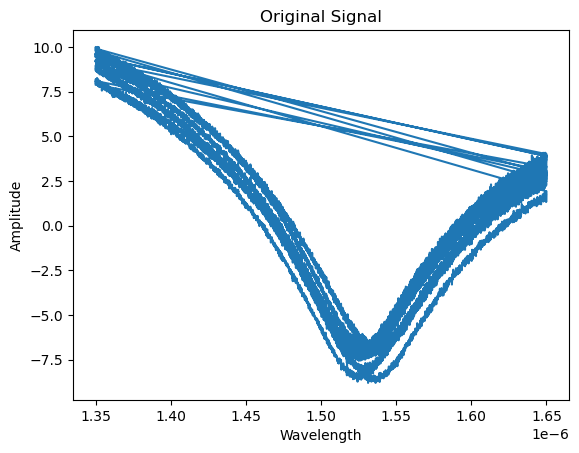

In [10]:
air_pplot = plt.plot(air["air signal wavelength"], air['air signal amplitude'])
air_plot = plt.title('Original Signal')
air_plot = plt.xlabel('Wavelength')
air_plot = plt.ylabel('Amplitude')
plt.show()

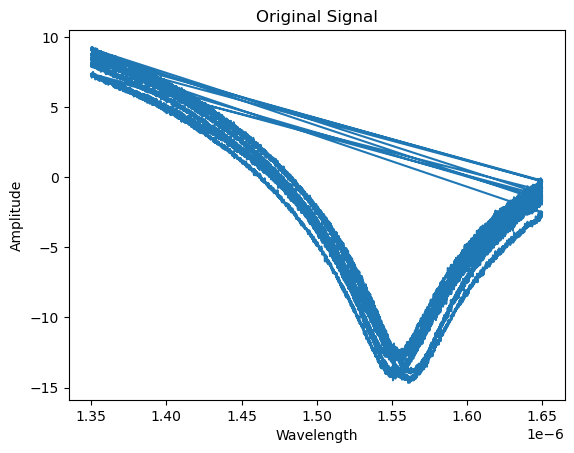

In [11]:
# WATER DATA
water_pplot = plt.plot(water["water signal wavelength"], water['water signal amplitude'])
water_plot = plt.title('Original Signal')
water_plot = plt.xlabel('Wavelength')
water_plot = plt.ylabel('Amplitude')
plt.show()

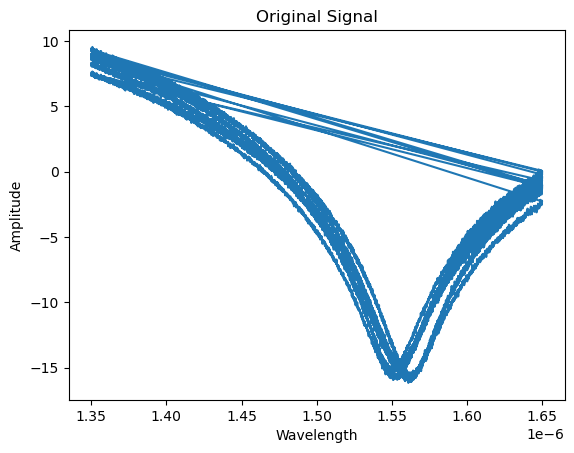

In [12]:
# izopropanol data
izo_pplot = plt.plot(izopropanol["izopropanol signal wavelength"], izopropanol['izopropanol signal amplitude'])
izo_plot = plt.title('Original Signal')
izo_plot = plt.xlabel('Wavelength')
izo_plot = plt.ylabel('Amplitude')
#x = plt.scatter(water.iloc[:,0], water.iloc[:,1])
plt.show()

### 4. Computing Pearson Correlation Coefficient 

In [ ]:
# compute the pearson correlation coefficients for air and water
def pearson_r(signal1, signal2):
    #"""Compute Pearson correlation coefficient between signals."""
    
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(signal1,signal2)

    # Return entry
    return corr_mat[0,1]

# Compute Pearson correlation coefficient 
r_air_water = pearson_r(air,water)

# Print the result


In [ ]:
# compute the pearson correlation coefficients for air and izopropanol
def pearson_r(signal1, signal2):
    #"""Compute Pearson correlation coefficient between signals."""
    
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(signal1,signal2)

    # Return entry
    return corr_mat[0,1]

# Compute Pearson correlation coefficient 
r_air_izopropanol = pearson_r(air,izopropanol)

# Print the result
print(f'Pearson correlation between air & izopropanol is: {r}')

In [13]:
# compute the pearson correlation coefficients for air and izopropanol
def pearson_r(signal1, signal2):
    #"""Compute Pearson correlation coefficient between signals."""
    
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(signal1,signal2)

    # Return entry
    return corr_mat[0,1]

# Compute Pearson correlation coefficient 
r_air = pearson_r(air["air signal wavelength"], air['air signal amplitude'])

# Print the result
print(f'Pearson correlation between air signal wavelength & air signal amplitude  is: {r_air}')

Pearson correlation between air signal wavelength & air signal amplitude  is: -0.5929334687261768


### 5. Feature Extration - Spectral Analysis - Applying  Fourier Transform to extract features from the air signals 

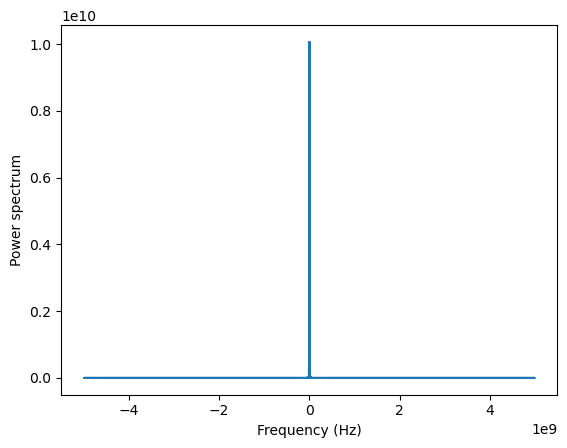

<Figure size 1000x1000 with 0 Axes>

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Load the data for one sensor measured in air
air_data = air

# Extract the wavelength and amplitude values
wavelength = air_data["air signal wavelength"]
amplitude = air_data["air signal amplitude"]

# Apply Fourier transform to the signal
amplitude_fft = np.fft.fft(amplitude)

# Compute the power spectrum
power_spectrum = np.abs(amplitude_fft)**2

# Compute the frequencies
freq = np.fft.fftfreq(len(amplitude), d=wavelength[1]-wavelength[0])

# Plot the power spectrum
plt.plot(freq, power_spectrum)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power spectrum")
plt.figure(figsize=(10,10))
plt.show()

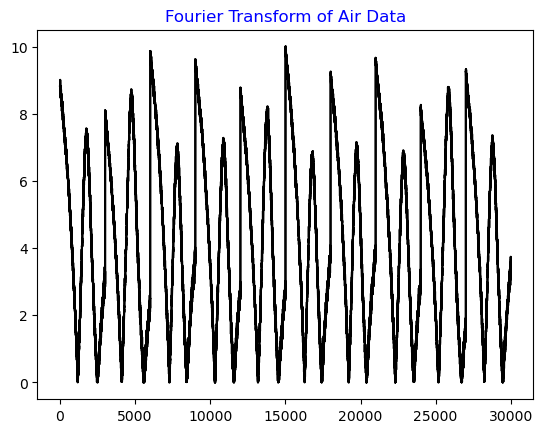

In [15]:
# compute fourier transform for air signals data
fourier_transform = np.fft.fft(air)

#plotting the fourier transform
plt.plot(np.abs(fourier_transform), color="black")
plt.title("Fourier Transform of Air Data", color="blue")
plt.show()

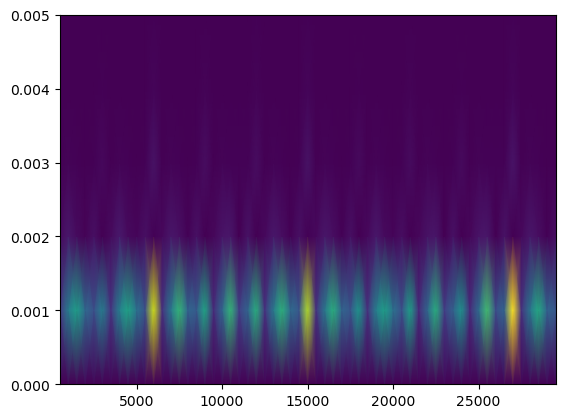

In [16]:
# creating spectograms for air signals independenly

signal2 = air_data["air signal amplitude"]
f,t,Sxx = spectrogram(signal2,noverlap=500,nperseg=1000)

plt.pcolormesh(t,f,Sxx, shading="gouraud")
plt.ylim([0,.005])
plt.show()

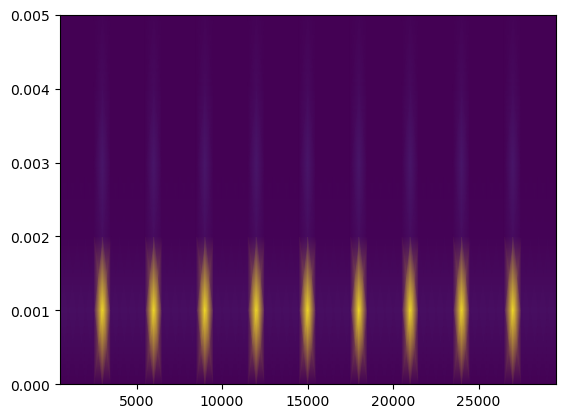

In [17]:
signal1 = air_data["air signal wavelength"]
f,t,Sxx = spectrogram(signal1 ,noverlap=500,nperseg=1000)

plt.pcolormesh(t,f,Sxx, shading="gouraud")
plt.ylim([0,.005])
plt.show()

#### Some of the features that can be extracted from the data using Fourier transform and spectral analysis for the machine learning model are:

* The Fourier transform decomposes a time-domain signal into its constituent frequencies. By analyzing the frequency domain of the signal, you can extract features such as the dominant frequency, frequency distribution, and frequency bands.

* Frequency components: The Fourier transform can be used to identify the frequency components in the signal. These frequency components can be used as features in the machine learning model.

* Spectral power distribution: The spectral power distribution can be used as a feature in the machine learning model. It can give an indication of the distribution of energy in the signal.

* Signal shape features: The shape of the signal in the time domain can also be used to extract features. For example, you can calculate the standard deviation of the signal, the slope of the signal, or the area under the signal curve.

### Extracting frequency distribution as a feature 

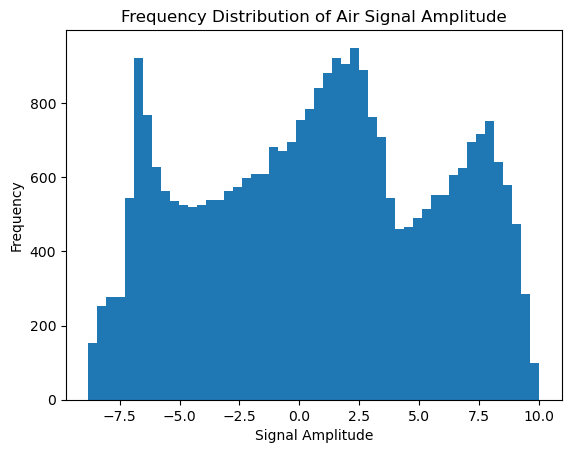

In [18]:
air_data = air
signal = air_data["air signal amplitude"]

plt.hist(signal, bins=50)
plt.xlabel("Signal Amplitude")
plt.ylabel("Frequency")
plt.title("Frequency Distribution of Air Signal Amplitude")
plt.show()

# Extract frequency distribution features from air data
air_freq = np.array(signal)

## 6. Split Data into Training and Test Sets:

* Split the preprocessed data into training and test sets. The training set will be used to train the machine learning model, and the test set will be used to evaluate the performance of the model.

In [41]:
# split data into training and testing datasets
from sklearn.model_selection import train_test_split
X = air  # independent variables
y_water = water  # dependent variable for water
y_izopropanol = izopropanol  # dependent variable for izopropanol
X_train, X_test, y_train, y_test = train_test_split(X, y_water, test_size=0.2, random_state=42)  # split for water data
X_train, X_test, y_train, y_test = train_test_split(X, y_izopropanol, test_size=0.2, random_state=42)  # split for izopropanol data

## 7. Train and Evaluate Different Regression Models

In [71]:
# Train a linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Evaluate model
y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MSE of linear regression is: ", mse, " The root mean squared error is: ", np.sqrt(mse))
print(f"R-squared: {r2}")



print("*"*60)
# frequency distribution feature from air data
air_freq = np.array(signal)

# Create dataset with sensor characteristics in water and isopropanol
X = air_freq.reshape(-1,1)
y = pd.concat([water['water signal amplitude'], izopropanol['izopropanol signal amplitude']], axis=1)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MSE r of Random Forest Regressor: {mse}", " The root mean squared error is: ", np.sqrt(mse))
print(f"R-squared: {r2}")




print("*"*60)
# Train a decision tree model
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)

# Evaluate the model 
y_pred = dtr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("MSE of DecisionTreeRegressor is: ", mse, " The root mean squared error is: ", np.sqrt(mse))
print(f"R-squared: {r2}")



print("*"*60)
X_train_water, X_test_water, y_train_water, y_test_water = train_test_split(X, y_water, test_size=0.2, random_state=42)
poly = PolynomialFeatures(degree=3)
X_poly = np.array(poly.fit_transform(X_train_water))
X_poly_test = np.array(poly.fit_transform(X_test_water))
rp = LinearRegression()
rp.fit(X_poly, y_train_water)

# Evaluating model
y_pred = rp.predict(X_poly_test)
mse = mean_squared_error(y_test_water, y_pred)
r2 = r2_score(y_test_water, y_pred)
print("MSE of multiple linear regression is: ", mse, " The root mean squared error is: ", np.sqrt(mse))
print(f"R-squared: {r2}")
print("*"*60)

MSE of linear regression is:  9.894577835590027  The root mean squared error is:  3.1455647880134383
R-squared: 0.7830091134316242
************************************************************
MSE r of Random Forest Regressor: 12.69905738252647  The root mean squared error is:  3.563573681366287
R-squared: 0.7217210808978862
************************************************************
MSE of DecisionTreeRegressor is:  17.295866574816497  The root mean squared error is:  4.158829952620868
R-squared: 0.7217210808978862
************************************************************
MSE of multiple linear regression is:  3.961754442668673  The root mean squared error is:  1.990415645705357
R-squared: 0.6955935751637474
************************************************************





### *Here are some other possible parameters/characteristics:*

* Sensitivity: The sensitivity of a sensor measures how much the output signal changes in response to a change in the input signal. In air, the sensor may have a certain sensitivity, but this could be different in water or isopropanol. By analyzing the behavior of the sensor in air, it may be possible to develop a model that predicts its sensitivity in different media.



In [23]:
model = lr.fit(X_train, y_train)

# The slope of the linear regression line is the sensitivity 
# of the sensor in air
sensitivity_air = model.coef_[0][0]
sensitivity_air

1.0000000000000004

* Response time: Response time is the time it takes for a sensor to detect and report changes in the environment. By analyzing the response time of the sensor in air, it may be possible to develop a model that predicts its response time in water and isopropanol.

In [24]:
# Calculate response time
threshold = max(air['air signal amplitude']) / 2.0
rise_time = air[air['air signal amplitude'] > threshold].iloc[0]['air signal wavelength']
fall_time = air[air['air signal amplitude'] > threshold].iloc[-1]['air signal wavelength']
response_time = fall_time - rise_time

print('Response time in air:', response_time)

Response time in air: 7.599999999999999e-08


Others parameters/characteristics that could be useful:

* Calibration: Calibration refers to the process of adjusting a sensor to ensure accurate and reliable readings. By analyzing the calibration process in air, it may be possible to develop a model that predicts the calibration process for the sensor in water and isopropanol.


* Power requirements: Power requirements refer to the amount of energy needed to operate the sensor. By analyzing the power requirements of the sensor in air, it may be possible to develop a model that predicts its power requirements in water and isopropanol.

### 8. Summary , final thoughts & ideas



* As i presented earlier, supervised machine learning can be used to predict the behavior of the sensor in different conditions based on data collected in air. This can also reduce the amount of time and resources required for physical testing.

* As i showed by analyzing signals in frequency domain  it is possible to obtain more information about the signals and extract additional features. Analysis in frequency domain can reduce the amount of time and resources required for physical testing.

Other ideas that could be implemented: 
* Simulations can be used to create a virtual environment where the behavior of the sensor in different conditions can be studied.

* Statistical methods can be used to analyze the data and extract meaningful insights. This can help to identify the most important factors that affect the performance of the sensor and reduce the number of experiments.

* Using cross-validation instead of a single validation set. Cross-validation splits the data into several folds, trains the model on different folds, and evaluates it on the remaining fold. This way, we can get a more reliable estimate of the model's performance without sacrificing too much data for training or testing.


* Overall, developing a  regression model to predict the characteristics of a sensor in different media based on its performance in air can be useful to reduce the validation process, while still ensuring accurate and reliable performance in the final application.In my opinion connecting to a source of live data stream would be a better idea than cross validation. This way we can immediately detect flaws of the a model and take necessary actions for optimization. 

If you are not satisfied please let me know if you want me to develop this project further or more complex:) best regards , Patryk K.